# Gas Cloud
In this activity you will create your own word clouds using a subset of the Reuters corpus. 

In [1]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

# Code to download wordnet corpora
import nltk
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\TribThapa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
# Get reuters stories where categories='gas'
ids = reuters.fileids(categories='gas')

gas_data = [reuters.raw(i) for i in ids]

In [3]:
# Check data
print(f"Example: \n"
      f"{gas_data[0]}")
print()
print(f"{type(gas_data)}")

Example: 
FINNS AND CANADIANS TO STUDY MTBE PRODUCTION PLANT
  Finland's national oil company Neste Oy
  &lt;NEOY.HE> said in a statement it had agreed with Canadian firms
  to study the feasibility of building a plant in Edmonton,
  Canada, to produce a replacement for lead in petrol.
      The prospective plant would cost an estimated 270 mln
  Canadian dlrs and would produce methyl tertiary butyl ether
  (MTBE) from raw materials available locally, it said.
      The partners in the study are Neste Oy, Celanese Canada
  Inc, Hoechst Celanese Corporation and Trade Mountain Pipe Line
  Company Ltd, of Vancouver, B.C.
      The Edmonton site was suitable because of the raw materials
  availability, the proximity to pipeline transportation and the
  important capital and operating advantages gained by locating
  on an existing Celanese Canada site, the statement said.
      The partners would look into the feasibility of a plant
  producing 500,000 tonnes per annum of MTBE, an octane en

In [4]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', doc)
    
    words = word_tokenize(re_clean)
    
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return ' '.join(output)

In [5]:
# Process text for wordcloud creation
gas_string = ' '.join(gas_data)

process_gas_data = process_text(gas_string)

type(process_gas_data)

str

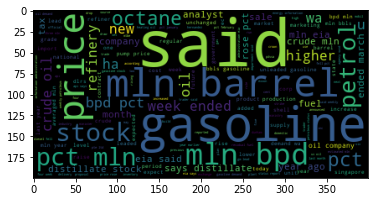

In [6]:
# Generate wordcloud
gas_wc = WordCloud().generate(process_gas_data)

plt.imshow(gas_wc)

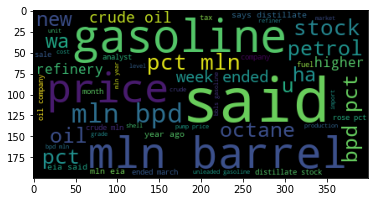

In [7]:
# Generate wordcloud
gas_wc = WordCloud(max_words=50).generate(process_gas_data)

plt.imshow(gas_wc)

In [8]:
# Generate wordcloud
# YOUR CODE HERE

## Challenge: Create a word cloud thatn only includes bigrams

In [9]:
from nltk.util import ngrams

In [21]:
from collections import Counter

def process_text_bg(doc):
    
    sw = set(stopwords.words('english'))
    
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', doc)
    
    words = word_tokenize(re_clean)
    
    lem = [lemmatizer.lemmatize(word) for word in words]
    
    words = [word.lower() for word in lem if word.lower() not in sw]
    
    bigram_counts = ngrams(words, n=2)
    
    output = ['_'.join(i) for i in bigram_counts]

    return ' '.join(output)

In [22]:
# Process text for wordcloud creation
wc = ' '.join(gas_data)

process_bigrams = process_text_bg(wc)

process_bigrams[:100]

'finns_canadians canadians_study study_mtbe mtbe_production production_plant plant_finlands finlands_'

In [ ]:
# Generate wordcloud
bigrams_wc = WordCloud().generate(process_bigrams)

plt.imshow(bigrams_wc)

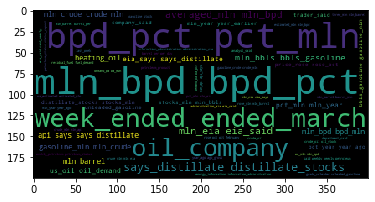

In [9]:
# Generate wordcloud
